In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [97]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
print("Station Table")
print("-----------------")
for column in columns:
    print(column["name"], column["type"])

engine.execute('SELECT * FROM station LIMIT 5').fetchall()

Station Table
-----------------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [98]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
print("Measurement Table")
print("-----------------")
for column in columns:
    print(column["name"], column["type"])
    
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

Measurement Table
-----------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

### Precipitation Analysis

In [120]:
# Calculate the date 1 year ago from the last data point in the database

    # finds last date entered into the measurment table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date2 = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
print(f"last date in the Measurment table is: {last_date2}")

    # finds date that is 1 year before the last date entered into the measurment table
year_before_last_date = dt.date(last_date2.year, last_date2.month, last_date2.day) - dt.timedelta(weeks=52)
print(f"1 year ago from last date in the Measurment table is: {year_before_last_date}")

last date in the Measurment table is: 2017-08-23 00:00:00
1 year ago from last date in the Measurment table is: 2016-08-24


In [122]:
# Perform a query to retrieve the data and precipitation scores

    # Grabs the dates and precipitation values for from 2016/08/24 to 2017/08/23
year_of_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_before_last_date).all()
year_of_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [123]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(year_of_data, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date")
prcp_df.head(15)

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
2016-08-24,1.22
2016-08-25,0.08
2016-08-25,0.00


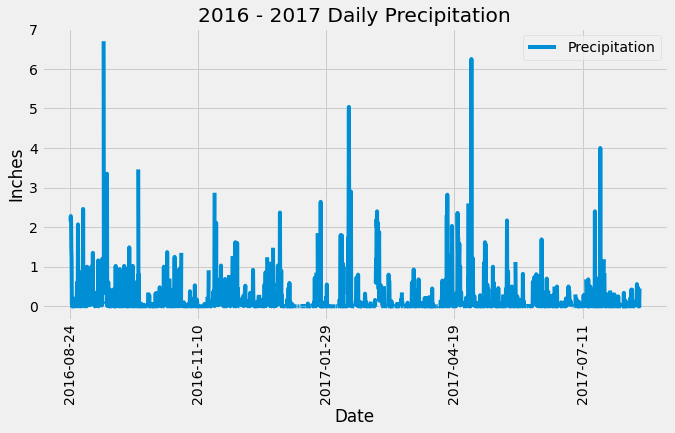

In [127]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_bar_chart = prcp_df.plot(rot=90, figsize=(10,5))
prcp_bar_chart.set_ylabel("Inches")
prcp_bar_chart.set_title("2016 - 2017 Daily Precipitation")
plt.show()


In [90]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [60]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Station.station).distinct().count()
print(f"Total number of weather stations: {station_count}")   

Total number of weather stations: 9


In [44]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [133]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.round(func.avg(Measurement.tobs),1), 
       func.max(Measurement.tobs),]

temp_values = session.query(*sel).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

print(f"Station: {temp_values[0][0]} || Low Temp: {temp_values[0][1]} || Average Temp: {temp_values[0][2]} || High Temp: {temp_values[0][3]}")

Station: USC00519281 || Low Temp: 54.0 || Average Temp: 71.7 || High Temp: 85.0


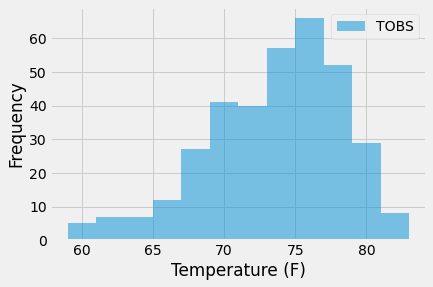

In [67]:
# Choose the station with the highest number of temperature observations.

    # lists each station and shows the count of tempreture observations that were made
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
   
    #filter query for last 12 months (Dates where figured out in a previously) of temp readings for 
year_of_temp_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= year_before_last_date).\
    filter(Measurement.station == "USC00519281").all()
    
    # Puts the query into a pandas dateframe 
tobs_df = pd.DataFrame(year_of_temp_data, columns=['Date', 'TOBS'])
tobs_df.set_index('Date', inplace=True)

    # Make a histogram chart from pandas dateframe 
temp_hist = tobs_df.plot.hist(bins=12, alpha=0.5)
temp_hist.set_xlabel("Temperature (F)")
temp_hist

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
